In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
datos1 = np.loadtxt('/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/EstadoBasal.txt')
datos2 = np.loadtxt('/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/AguantandoRespiración.txt')
datos3 = np.loadtxt('/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/DespuésdeAguantarRespiración.txt')

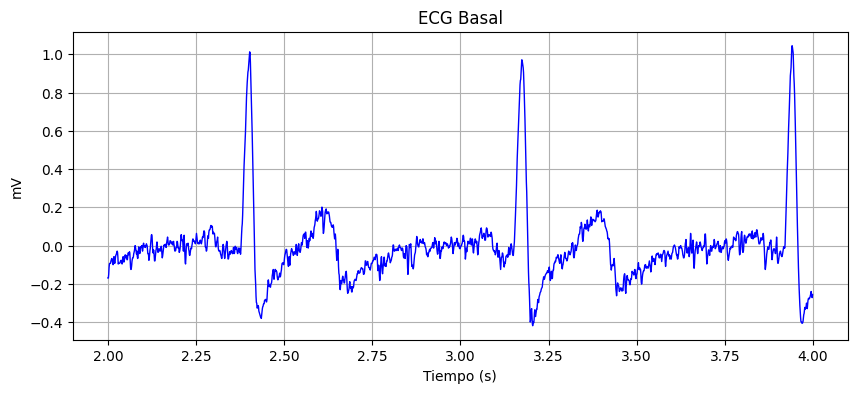

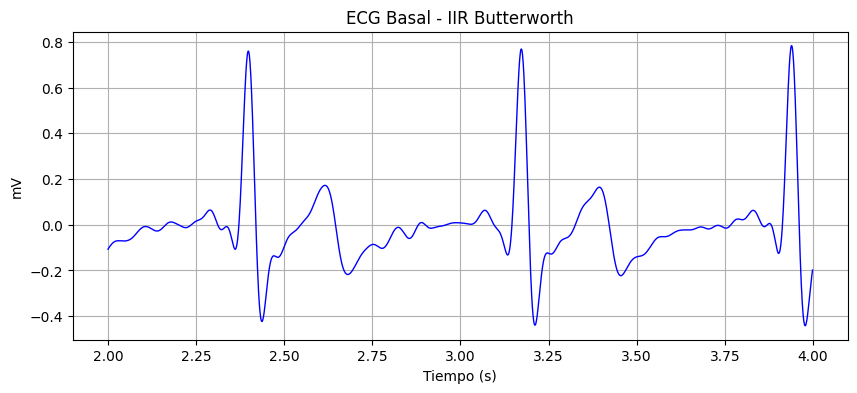

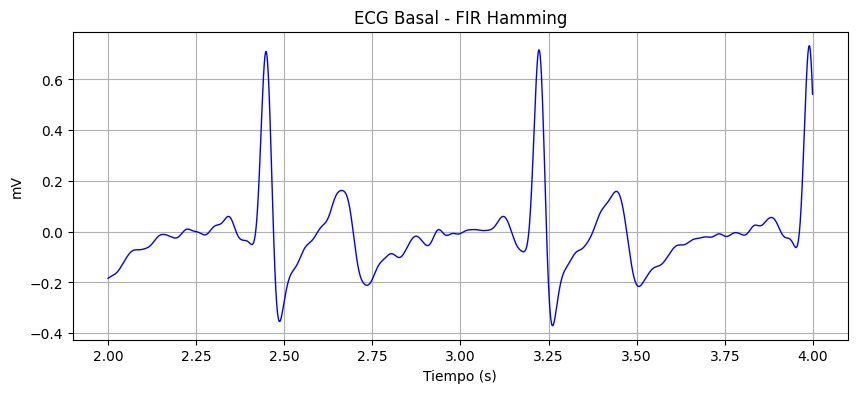

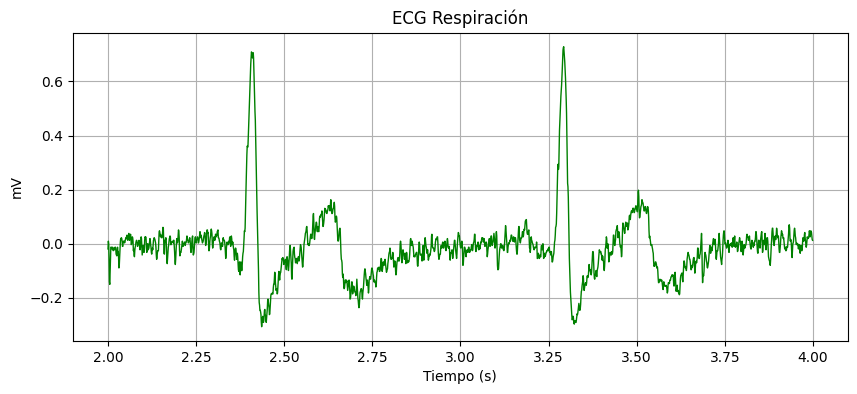

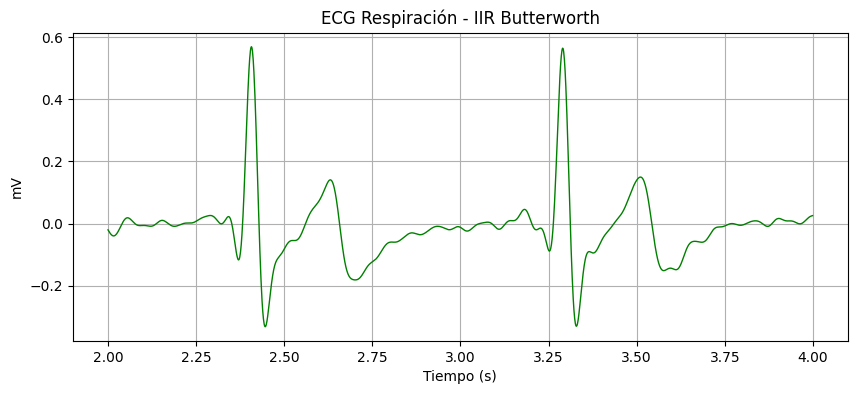

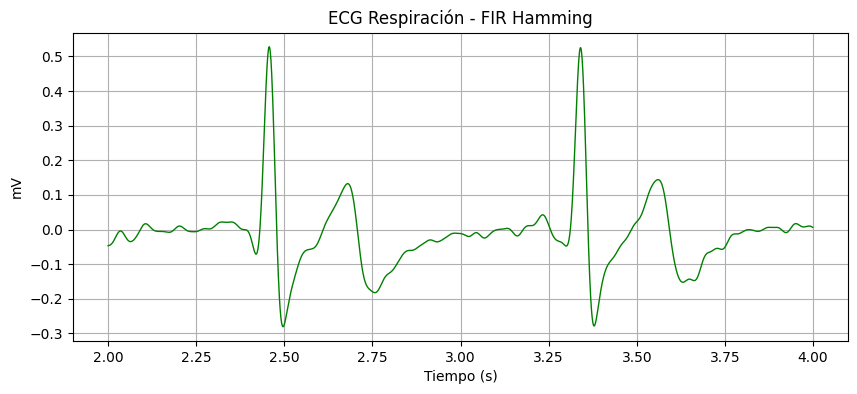

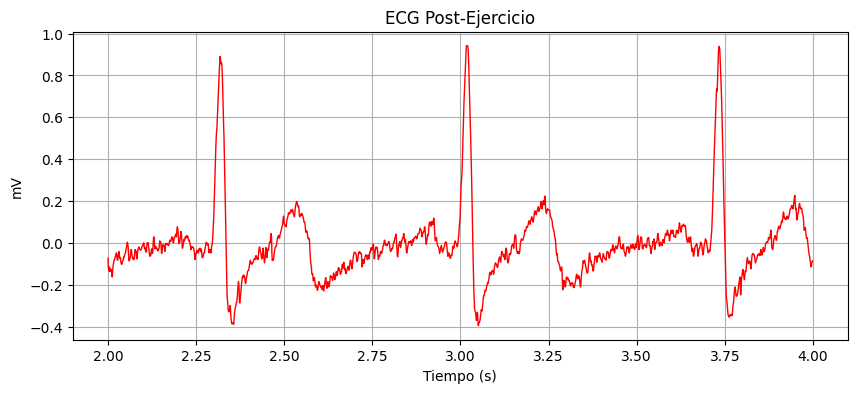

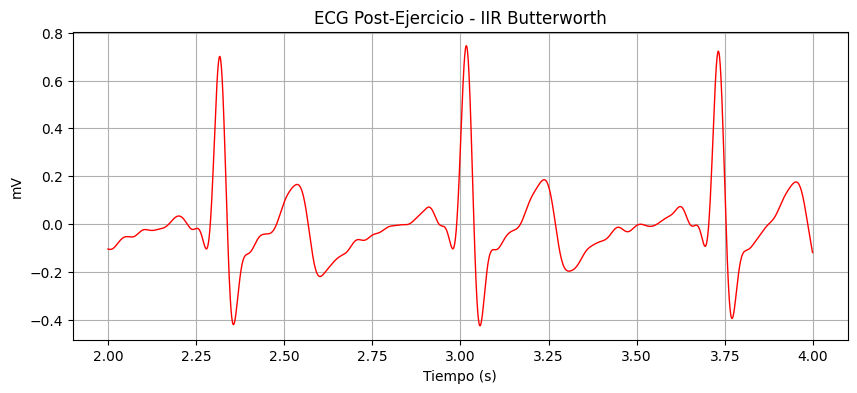

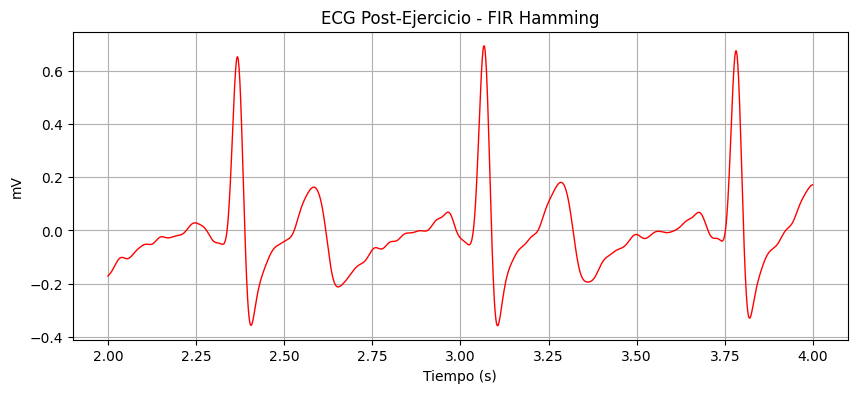

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, firwin, lfilter

# Constantes
VCC = 3.3  # Voltaje de alimentación
n = 10     # Número de bits
Fs = 1000  # Frecuencia de muestreo

# Funciones de filtrado
def butter_lowpass_filter(data, cutoff=20, fs=1000, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)  # Usamos filtfilt para evitar desfases en la señal
    return y

def fir_lowpass_filter(data, cutoff=20, fs=1000, numtaps=101):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b = firwin(numtaps, normal_cutoff, window='hamming')
    y = lfilter(b, [1.0], data)
    return y

# Carga y preparación de datos
def prepare_data(filepath, column_index):
    data = np.loadtxt(filepath, usecols=[column_index])
    data = 1000 * ((((data / (2 ** n)) - 0.5) * VCC) / 1009)  # Conversión a mV
    return data

datos_basal = prepare_data("/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/EstadoBasal.txt", 6)
datos_respiracion = prepare_data("/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/AguantandoRespiración.txt", 6)
datos_post_ejercicio = prepare_data("/content/drive/My Drive/8vo ciclo ANDREA/Proyecto Intro señales/Lab4 - ECG/ECG/DespuésdeAguantarRespiración.txt", 6)

# Filtrado de datos
datos_basal_iir = butter_lowpass_filter(datos_basal)
datos_respiracion_iir = butter_lowpass_filter(datos_respiracion)
datos_post_ejercicio_iir = butter_lowpass_filter(datos_post_ejercicio)

datos_basal_fir = fir_lowpass_filter(datos_basal)
datos_respiracion_fir = fir_lowpass_filter(datos_respiracion)
datos_post_ejercicio_fir = fir_lowpass_filter(datos_post_ejercicio)

# Función para graficar las señales filtradas y crudas acotadas
inicio, fin = 2, 4  # Intervalo de tiempo en segundos
inicio_muestreo, fin_muestreo = int(inicio * Fs), int(fin * Fs)

def plot_segment(title, data, tiempo, color, ylabel, filter_name=''):
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo[inicio_muestreo:fin_muestreo], data[inicio_muestreo:fin_muestreo], lw=1, color=color)
    plt.title(f'{title} - {filter_name}' if filter_name else title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Graficar cada tipo de datos con nombres de filtros específicos
for label, data_set, filter_name in [('Cruda', datos_basal, ''), ('IIR', datos_basal_iir, 'IIR Butterworth'), ('FIR', datos_basal_fir, 'FIR Hamming')]:
    plot_segment('ECG Basal', data_set, tiempo_basal, 'blue', 'mV', filter_name)

for label, data_set, filter_name in [('Cruda', datos_respiracion, ''), ('IIR', datos_respiracion_iir, 'IIR Butterworth'), ('FIR', datos_respiracion_fir, 'FIR Hamming')]:
    plot_segment('ECG Respiración', data_set, tiempo_respiracion, 'green', 'mV', filter_name)

for label, data_set, filter_name in [('Cruda', datos_post_ejercicio, ''), ('IIR', datos_post_ejercicio_iir, 'IIR Butterworth'), ('FIR', datos_post_ejercicio_fir, 'FIR Hamming')]:
    plot_segment('ECG Post-Ejercicio', data_set, tiempo_post_ejercicio, 'red', 'mV', filter_name)
